# Problem 4
For this problem, you need to use the built-in sklearn digits dataset. You can load this data using Sklearn.datasets.load_digits (*, n_class=10,return_X_y=False, as_frame=False) Divide the data into training and test sets using train_test_split and random_state=0 The goal is to train a Random Forest classifier and optimize its performance on this data.
1. Identify the most important parameters that affect the performance of the Random Forest classifier and outline your experimental design (using 4-fold cross validation) to learn the optimal values for these parameters.
2. Analyze the results of the classifier using its optimal parameters and comment on its generalization capability.
3. Visualize and explain the relevant features identified by the Random Forest classifier.
+ Create a white 8x8 image that represents the original 64 features. Map each identified relevant feature to this 2D image and display it using a grey scale that reflects its importance (e.g. 0 most relevant feature and 255  least relevant feature).
4. Identify one misclassified sample from each class (if they exist). Visualize each misclassified sample as an 8x8 image, and use its nearest neighbors and the learned important features to explain why it was misclassified.

Hint: for examples on how to read this data and visualize it, check
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glrauto-examples-classification-plot-digits-classification-py

## Import and setup data

In [150]:
import heapq

import numpy as np
import pandas as pd
import sklearn.datasets
import sklearn_evaluation
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

digits = sklearn.datasets.load_digits(n_class=10, return_X_y=False, as_frame=False)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    random_state=0
)
print(len(X_train))
print(len(X_test))

1347
450


## Train Random Forest classifier

In [136]:
np.random.seed(42)


def grid_search_random_forest(
        n_estimators,
        max_features,
        max_depth=None,
        max_leaf_nodes=None
):
    parameters = {
        'n_estimators': n_estimators,
        'max_features': max_features,
    }
    if max_depth is not None:
        parameters.update({'max_depth': max_depth, })
    if max_leaf_nodes is not None:
        parameters.update({'max_leaf_nodes': max_leaf_nodes})
    classifier = RandomForestClassifier(random_state=0)

    grid_search = GridSearchCV(
        classifier,
        parameters,
        cv=4,
        return_train_score=True,

    )

    grid_search.fit(X_train, y_train)
    print("Best n_estimators: ", grid_search.best_params_['n_estimators'])
    print("Best max_features: ", grid_search.best_params_['max_features'])
    if max_depth is not None:
        print("Best max_depth: ", grid_search.best_params_['max_depth'])
    if max_leaf_nodes is not None:
        print("Best max_leaf_nodes: ", grid_search.best_params_['max_leaf_nodes'])
    predictions = grid_search.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
    return grid_search


def graph_grid_search_random_forest(grid_search):
    sklearn_evaluation.evaluator.plot.grid_search(
        grid_search.cv_results_,
        change=("n_estimators", "max_features")
    )

    plt.title("Random Forest")
    plt.xlabel("n_estimators")
    plt.ylabel("max_features")
    plt.legend()
    plt.show()

In [137]:
np.random.seed(42)

n_estimators = np.linspace(20, 40, 3, dtype=int)
max_features = np.linspace(1, 12, 6, dtype=int)

grid_search = % time grid_search_random_forest( n_estimators, max_features )

Best n_estimators:  40
Best max_features:  3
Accuracy:  0.9622222222222222
CPU times: user 4.48 s, sys: 41.8 ms, total: 4.52 s
Wall time: 4.53 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


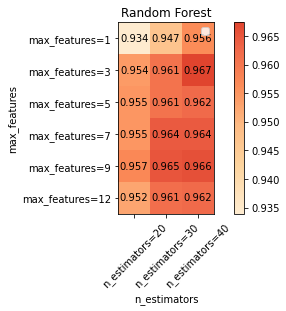

In [138]:
graph_grid_search_random_forest(grid_search)


In [139]:
np.random.seed(42)

n_estimators = np.linspace(40, 100, 3, dtype=int)
max_features = np.linspace(7, 16, 6, dtype=int)

grid_search = % time grid_search_random_forest( n_estimators, max_features )

Best n_estimators:  100
Best max_features:  8
Accuracy:  0.9755555555555555
CPU times: user 11.8 s, sys: 68.8 ms, total: 11.8 s
Wall time: 11.9 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


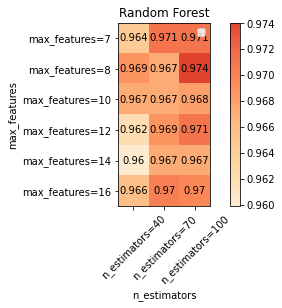

In [140]:
graph_grid_search_random_forest(grid_search)


In [141]:
np.random.seed(42)

n_estimators = np.linspace(50, 90, 5, dtype=int)
max_features = np.linspace(10, 14, 5, dtype=int)

grid_search = % time grid_search_random_forest( n_estimators, max_features )

Best n_estimators:  80
Best max_features:  11
Accuracy:  0.98
CPU times: user 17.4 s, sys: 114 ms, total: 17.5 s
Wall time: 17.6 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


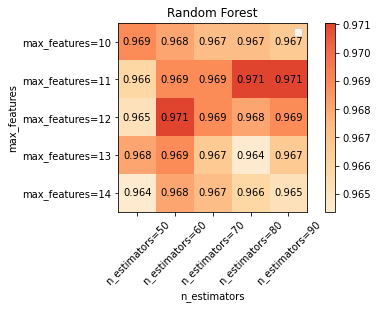

In [142]:
graph_grid_search_random_forest(grid_search)

In [143]:
np.random.seed(42)

n_estimators = np.linspace(20, 40, 3, dtype=int)
max_features = np.linspace(1, 12, 6, dtype=int)
max_depth = np.linspace(5, 50, 5, dtype=int)

grid_search = % time grid_search_random_forest(n_estimators, max_features, max_depth)

Best n_estimators:  40
Best max_features:  3
Best max_depth:  27
Accuracy:  0.9622222222222222
CPU times: user 20.7 s, sys: 223 ms, total: 20.9 s
Wall time: 21 s


In [144]:
np.random.seed(42)

n_estimators = np.linspace(60, 100, 3, dtype=int)
max_features = np.linspace(9, 15, 6, dtype=int)
max_depth = np.linspace(5, 50, 5, dtype=int)

grid_search = % time grid_search_random_forest(n_estimators, max_features, max_depth)

Best n_estimators:  80
Best max_features:  11
Best max_depth:  16
Accuracy:  0.98
CPU times: user 1min 7s, sys: 504 ms, total: 1min 7s
Wall time: 1min 8s


In [145]:
np.random.seed(42)

n_estimators = np.linspace(60, 100, 3, dtype=int)
max_features = np.linspace(9, 15, 3, dtype=int)
max_depth = np.linspace(10, 30, 3, dtype=int)
max_leaf_nodes = np.linspace(1, 50, 5, dtype=int)

grid_search = % time grid_search_random_forest(n_estimators, max_features, max_depth, max_leaf_nodes)

Best n_estimators:  80
Best max_features:  9
Best max_depth:  20
Best max_leaf_nodes:  50
Accuracy:  0.9533333333333334
CPU times: user 1min 9s, sys: 352 ms, total: 1min 10s
Wall time: 1min 10s


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
108 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/

In [146]:
np.random.seed(42)

n_estimators = np.linspace(60, 100, 3, dtype=int)
max_features = np.linspace(12, 18, 3, dtype=int)
max_depth = np.linspace(5, 15, 3, dtype=int)
max_leaf_nodes = np.linspace(40, 140, 5, dtype=int)

grid_search = % time grid_search_random_forest(n_estimators, max_features, max_depth, max_leaf_nodes)

Best n_estimators:  100
Best max_features:  15
Best max_depth:  15
Best max_leaf_nodes:  115
Accuracy:  0.9711111111111111
CPU times: user 1min 36s, sys: 454 ms, total: 1min 36s
Wall time: 1min 36s


## Test the trained model

In [205]:
np.random.seed(42)

rf = RandomForestClassifier(
    n_estimators=100,
    max_features=12,
    max_depth=15,
    max_leaf_nodes=140
)
rf.fit(X_train, y_train)
print("Train: ", rf.score(X_train, y_train))
print("Test: ", rf.score(X_test, y_test))
y_predictions = rf.predict(X_test)
metrics.accuracy_score(y_test, y_predictions)

Train:  1.0
Test:  0.9755555555555555


0.9755555555555555

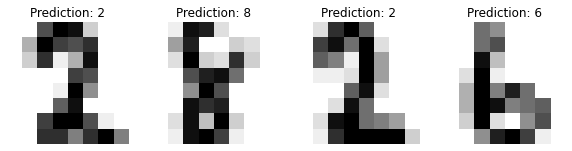

In [148]:


_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, importance_mask, actual in zip(axes, X_test, y_predictions):
    ax.set_axis_off()
    importance_mask = importance_mask.reshape(8, 8)
    ax.imshow(importance_mask, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {actual}")

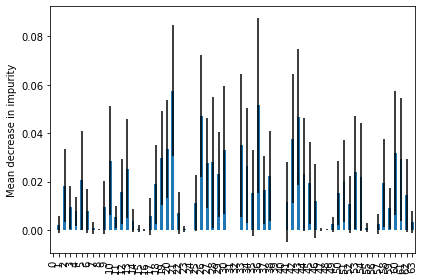

In [159]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [213]:
import heapq

print(importances)
most_important = heapq.nlargest(9, importances)
print(most_important)

count_over_threshold = sum(map(lambda x: x >= 0.03, importances))
print(count_over_threshold)

indices_of_most_important_features = []
for item in most_important:
    item_index = np.argwhere(importances == item)
    indices_of_most_important_features.append(item_index[0][0])

print(indices_of_most_important_features)

[0.00000000e+00 2.10431396e-03 1.83677547e-02 9.28261338e-03
 7.62547717e-03 2.04760689e-02 7.76879160e-03 9.71854074e-04
 4.79455581e-05 9.31581744e-03 2.86981284e-02 5.32971226e-03
 1.57540036e-02 2.53920980e-02 3.70290358e-03 5.51274648e-04
 4.72724558e-05 5.58527198e-03 1.88612380e-02 2.98262272e-02
 3.35185789e-02 5.75705884e-02 6.99603212e-03 2.46715506e-04
 0.00000000e+00 1.12406353e-02 4.72709690e-02 2.77831321e-02
 2.78898289e-02 2.29308660e-02 3.28928989e-02 0.00000000e+00
 0.00000000e+00 3.49809541e-02 2.66032318e-02 1.53846975e-02
 5.15379765e-02 1.65790929e-02 2.22232425e-02 0.00000000e+00
 1.33363291e-05 1.15630480e-02 3.76816889e-02 4.67359721e-02
 2.29311594e-02 1.94013799e-02 1.20364324e-02 1.05682425e-04
 2.49311163e-05 2.38779896e-03 1.52652612e-02 2.02712641e-02
 1.05509169e-02 2.37479677e-02 2.18940785e-02 8.84142791e-04
 0.00000000e+00 2.36952765e-03 1.93137507e-02 8.98137671e-03
 3.19250184e-02 2.91298517e-02 1.42562368e-02 3.17097011e-03]
[0.05757058837460065, 0

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 1  1 42  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  2  0  1  0  0  0  1 44  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


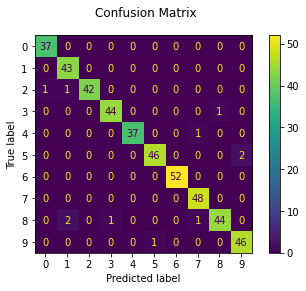

In [181]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [204]:
misclassified_indices = np.where((y_predictions != y_test))
print(misclassified_indices)

(array([ 56, 117, 122, 124, 130, 158, 167, 181, 275, 315, 378]),)


In [206]:
print('Expected: ', y_test[56])
print('Actual: ', y_predictions[56])
print(X_test[56])

Expected:  5
Actual:  9
[ 0.  0.  4. 12. 16. 16. 11.  2.  0.  0. 15. 13.  8. 11.  8.  1.  0.  2.
 15. 13. 16.  8.  0.  0.  0.  6. 16. 13. 13. 16.  2.  0.  0.  7. 11.  2.
  2. 16.  6.  0.  0.  0.  0.  0.  5. 15.  2.  0.  0.  0.  9.  6. 13. 10.
  0.  0.  0.  0.  7. 14. 13.  1.  0.  0.]


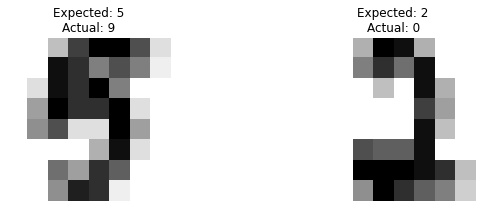

In [208]:

misclassified_items = np.array([X_test[56], X_test[117]])
expected_values = np.array([y_test[56], y_test[117]])
actual_values = np.array([y_predictions[56], y_predictions[117]])
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
for ax, importance_mask, expected, actual in zip(
        axes,
        misclassified_items,
        expected_values,
        actual_values
):
    ax.set_axis_off()
    importance_mask = importance_mask.reshape(8, 8)
    ax.imshow(importance_mask, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Expected: {expected}\nActual: {actual}")


In [219]:
importance_image = []
for i in range(0, 64):
    importance_image.append(0)
    if indices_of_most_important_features.__contains__(i):
        importance_image[i] = 1

importance_image = np.array(importance_image)
print(importance_image)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [254]:
import matplotlib.pyplot as plt


def map_importance_mask_over_digit_image(
        misclassified_image,
        importance_mask,
        expected_result,
        actual_result
):
    _, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
    ax = axes
    ax.set_axis_off()
    ax.imshow(
        misclassified_image,
        cmap=plt.cm.gray_r,
        interpolation="nearest",
    )
    ax.set_title(f"Expected: {expected_result}\nActual: {actual_result}")

    im = plt.imshow(
        importance_mask,
        cmap=plt.cm.gray_r,
        interpolation='none',
        vmin=0,
        vmax=1,
        aspect='equal',
        alpha=0
    )

    def rect(pos):
        r = plt.Rectangle(pos - 0.5, 1, 1, facecolor="none", edgecolor="cyan", linewidth=2)
        plt.gca().add_patch(r)

    x, y = np.meshgrid(np.arange(importance_mask.shape[1]), np.arange(importance_mask.shape[0]))
    m = np.c_[x[importance_mask.astype(bool)], y[importance_mask.astype(bool)]]

    for pos in m:
        rect(pos)

    plt.show()

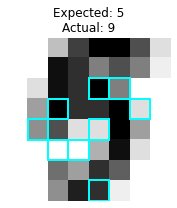

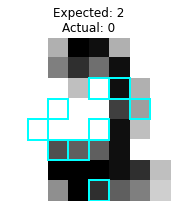

In [256]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax = axes
ax.set_axis_off()
misclassified_image = X_test[56].reshape(8, 8)
importance_mask = importance_image.reshape(8, 8)
ax.imshow(
    misclassified_image,
    cmap=plt.cm.gray_r,
    interpolation="nearest",
)
ax.set_title(f"Expected: {y_test[56]}\nActual: {y_predictions[56]}")

import matplotlib.pyplot as plt
import numpy as np

im = plt.imshow(importance_mask, cmap=plt.cm.gray_r, interpolation='none', vmin=0, vmax=1, aspect='equal', alpha=0)


def rect(pos):
    r = plt.Rectangle(pos - 0.5, 1, 1, facecolor="none", edgecolor="cyan", linewidth=2)
    plt.gca().add_patch(r)


x, y = np.meshgrid(np.arange(importance_mask.shape[1]), np.arange(importance_mask.shape[0]))
m = np.c_[x[importance_mask.astype(bool)], y[importance_mask.astype(bool)]]

for pos in m:
    rect(pos)

plt.show()

map_importance_mask_over_digit_image(
    X_test[117].reshape(8, 8),
    importance_image.reshape(8, 8),
    y_test[117],
    y_predictions[117]
)

In [225]:
sum(most_important)

0.37411464506583425

In [ ]:
sum(most_important)
